# galpy: Tackling Galatic Dynamics

**Author:** Jamie Vasquez-Rojas

**Date:** May 15, 2025

**PHYS265**

### [ 1 ]

The galpy package is Python-based package. For a variety of potential combinations, plotting rotation curves and integrating orbits are some of its most basic functions. However, galpy also supports the calculation of disk distribution functions and action-angle coordinates. So, this package shows to be very useful for galactic dynamics. Galpy is also noted to be an astropy affiliated package, meaning that while it is not managed by or a core part of astropy, it is in the astropy community as galpy has implemented astropy's framework for units.

### [ 2 ]

Initially I had selected to do the Gala package because it was in the "Suggested Projects" list, I wanted to do an astronomy related package, and I had a friend who was going to be using it too. While I was able to install Gala on my computer, it seemed to run into consistent errors while trying to cooperate with other packages like numpy, matplotlib, or astropy. After recieving help from Professor Teuben, he had suggested to do galpy as a similar alternative. galpy managed to install and work just fine, and I had looked at some of the tutorials (the orbit integration plots catching my eye the most), so I was okay with using galpy instead.

### [ 3 ]

The package was first published to the Astrophysics Source Code Library in November 2014 by Jo Bovy at the Institute for Advanced Study, Princeton, NJ. As I mentioned before, Gala performs similar functions as galpy such as dealing with gravitational potentials and integrating orbits, but was published later in July 2017. There are other tools such as NEMO and AMUSE which also deal with potentials, and galpy's documentation website notes their respective potential conversion process. The latest galpy version that I'll be using is 1.10.2, as printed below.

In [5]:
import galpy; print(galpy.__version__)

1.10.2


### [ 4 ]

Since their latest version was released on March 4, 2025, it seems like it's still being maintained to this day by the original author, along with one major contributor Aladdin Seaifan. Other help such as direct contributions to the code base, general help, or bug reports amount to over 30 people. Through galpy's Github page, there is a [full list of contributors](https://github.com/jobovy/galpy/blob/main/AUTHORS.txt) and a [guide for how to contribute to the code.](https://github.com/jobovy/galpy/wiki/Guide-for-new-contributors)

### [ 5, 6 ]

galpy was very easy to install and didn't take much time. I used the `!pip install galpy` command inside a jupyter notebook (I run on MacOS). However, there are also alternative ways to install it through condas, depending on the operating system, as noted in their installation guide.

### [ 7 ] 

galpy's source code can be inspected through their [GitHub page](https://github.com/jobovy/galpy).

### [ 8 ]

galpy is required to use m2mcluster, another python package that carries out "made-to-measure" star cluster modeling.

### [ 9 ]

This code is used here in a Jupyter Desktop Python 3 (ipykernel) Notebook.

### [ 10, 11, 12 ]

Below are some examples with the code. galpy relies on matplotlib to produce figures.

The code for Figure 1 and the Sun calculations was used from galpy's [documentation main website](https://docs.galpy.org/en/stable/). The code for Figure 2 and the 3D animated plot were used from galpy's [guide on orbit integration](https://docs.galpy.org/en/stable/orbit.html). Some comments/adjustments were included for better readability and to indicate the function of certain commands.

In [12]:
# calculating the Sun's orbital actions, frequencies, and angles
from galpy.orbit import Orbit
from galpy.potential import (
        MWPotential2014 as mwp14)
o= Orbit() # this sets it to be the orbit of the Sun in the intertial frame

# calculations
jr = o.jr(pot=mwp14) # radial action
Lz = o.Lz() # z-component of angular momentum
jz = o.jz(pot=mwp14) #vertical action

Or = o.Or(pot=mwp14) # radial frequency
Op = o.Op(pot=mwp14) # azimuthal frequency
Oz = o.Oz(pot=mwp14) # vertical frequency

wr = o.wr(pot=mwp14) # radial angle
wp = o.wp(pot=mwp14) # azimuthal angle
wz = o.wz(pot=mwp14) # vertical angle


print(f'jr = {jr} | Lz = {Lz} | jz = {jz}')
print(f'Or = {Or} | Op = {Op} | Oz = {Oz}')
print(f'wr = {wr} | wp = {wp} | wz = {wz}')

jr = 6.634894604552057 | Lz = 1857.92 | jz = 0.370783215133365
Or = 34.91846455835721 | Op = 26.125141583097463 | Oz = 69.02451757150546
wr = 5.800885677353392 | wp = 0.054795094441911996 | wz = 0.30719188356839044


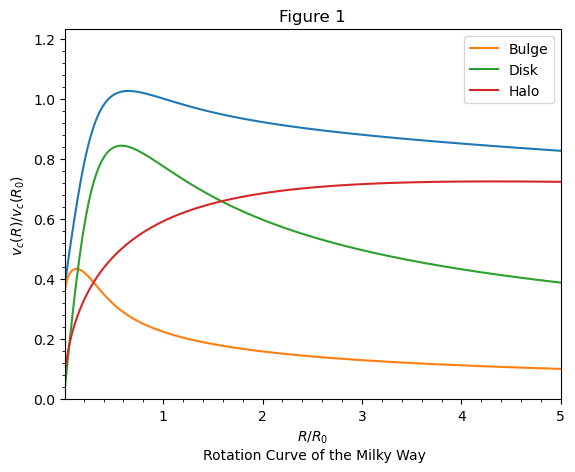

In [13]:
from galpy.potential import (plotRotcurve,
        MWPotential2014 as mwp14)
import matplotlib.pyplot as plt

plotRotcurve(mwp14)
plotRotcurve(mwp14[0],label='Bulge',overplot=True)
plotRotcurve(mwp14[1],label='Disk',overplot=True)
plotRotcurve(mwp14[2],label='Halo',overplot=True)

caption_text = "Rotation Curve of the Milky Way"
plt.text(1.4, -0.2, caption_text, fontsize=10)
plt.title('Figure 1')
plt.legend();

In [14]:
from galpy.orbit import Orbit
from galpy.potential import LogarithmicHaloPotential
lp= LogarithmicHaloPotential(normalize=1.) 
import numpy
ts= numpy.linspace(0,100,10000) # integrate the orbit from t = 0 to t = 100, at 10000 instances

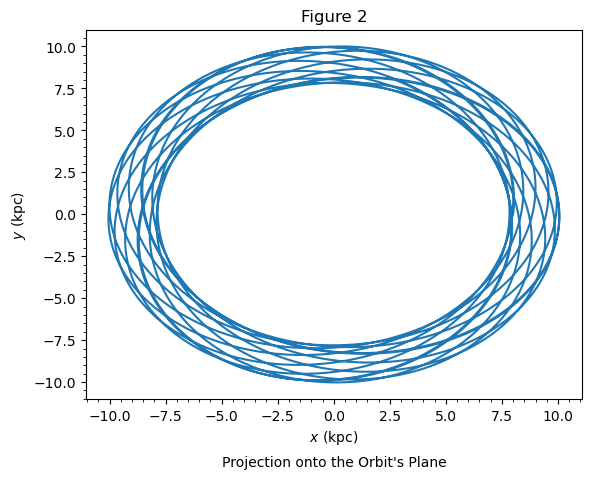

In [15]:
# initial conditions for Orbit() set as [R, vR, vT, z, vz, phi]
op= Orbit([1.,0.1,1.1,0.,0.1,0.],ro=8.,vo=220.) #Use Vc=220 km/s at R= 8 kpc as the normalization
# ro = distance from vantage point to galatic center, vo = circular velocity @ ro. these are optional parameters.
op.integrate(ts,lp) # given list of times, and the gravitational field to integrate that orbit in
op.plot(d1='x',d2='y') # d1 = first dimension to plot, d2 = second dimension to plot

caption_text = "Projection onto the Orbit's Plane"
plt.text(-5, -15, caption_text, fontsize=10)
plt.title('Figure 2');

In [16]:
# viewing the same orbit from before, but in 3D animation
op.animate3d(mw_plane_bg=True)

### [ 13 ] 

The package is largely made from python, but has some C implementations for speeding up computations.

### [ 14 ]

As shown in the code above, you can input your own parameters for the code (in that case, for setting initial orbit parameters). However, galpy can pull from existing data from SIMBAD, an astronomical database for extrasolar objects. This can be seen through galpy's `Orbit.from_name` command. However, you can also read in your own datasets, as the [galpy guide notes an example](https://docs.galpy.org/en/stable/actionAngle.html#example-evidence-for-a-lindblad-resonance-in-the-solar-neighborhood) using downloaded data from the Geneva-Copenhagen Survey (.tsv file in this case).

### [ 15 ] 

Also as shown in the code, orbital calculations and various plot types can be produced as the output.

### [ 16, 17 ] 

galpy does not seem to indicate a specific test to ensure that the code is working properly. However, the website guide code examples often include comments of the intended output, (or plots if that's what it's dealing with) which can be a helpful self-check. An example is shown below, pulled from the [two-dimensional disk distribution function (DF) section](https://docs.galpy.org/en/stable/basic_df.html#evaluating-moments-of-the-df) of the guide.

In [38]:
#evaluating the velocity dispersions of the disk distribution functions (for a DF with a scale length of 1/3)
# calls a specific distribution function (dehnendf) from Dehnen paper
from galpy.df import dehnendf
dfc= dehnendf(beta=0.) # beta = Power-law index of the rotation curve
print(numpy.sqrt(dfc.sigmaR2(1.))) # calculates sigma_R^2 at given R
# 0.19321086259083936
print(numpy.sqrt(dfc.sigmaT2(1.))) # calculates sigma_T^2 at given R
# 0.15084122011271159

0.19321086259083936
0.1508412201127134


### [ 18 ]

galpy depends on packages like numpy, scipy, and matplotlib. I noticed this while installing galpy, and seeing messages like "Requirement already satisfied: matplotlib" (and for numpy and scipy), come up in the output. Some optional dependencies include astropy for units and astroquery for the `Orbit.from_name` command.

### [ 19 ]

galpy's documentation website provided all the help I needed with the code specifically. It included plenty of code examples, explanations, and a library reference for the different functions and commands, which were incredibly useful. 

### [ 20 ]

They note to cite the following paper and add a link to their GitHub.

*galpy: A Python Library for Galactic Dynamics,* Jo Bovy (2015), Astrophys. J. Supp., 216, 29 ([arXiv/1412.3451](https://arxiv.org/abs/1412.3451))

http://github.com/jobovy/galpy

### [ 21 ] References

- galpy's Documentation Main Page: https://docs.galpy.org/en/stable/
- galpy's Introduction and Basic Tutorials: https://docs.galpy.org/en/stable/getting_started.html
- "Astropy Affiliated": https://www.astropy.org/affiliated/
- galpy on the Astrophysics Data System (ADS): https://ui.adsabs.harvard.edu/abs/2014ascl.soft11008B/abstract
- galpy PDF Publication: https://arxiv.org/pdf/1412.3451
- Gala mentioning galpy: https://gala.adrian.pw/en/latest/interop.html
- Gala on ADS: https://ui.adsabs.harvard.edu/abs/2017ascl.soft07006P/abstract
- galpy Contributors https://github.com/jobovy/galpy/blob/main/AUTHORS.txt
- galpy GitHub Contribution Guide: https://github.com/jobovy/galpy/wiki/Guide-for-new-contributors
- galpy Installation Guide: https://docs.galpy.org/en/stable/installation.html
- m2mcluster GitHub: https://github.com/webbjj/m2mcluster
- `Orbit.from_name` command: https://docs.galpy.org/en/v1.9.0/reference/orbitfromname.html
- Example which uses downloaded dataset: https://docs.galpy.org/en/stable/actionAngle.html#example-evidence-for-a-lindblad-resonance-in-the-solar-neighborhood
- galpy Guide on Orbit Integration: https://docs.galpy.org/en/stable/orbit.html
- galpy Guide on 2D Disk DF: https://docs.galpy.org/en/stable/basic_df.html#evaluating-moments-of-the-df
- galpy package citations: https://ui.adsabs.harvard.edu/abs/2014ascl.soft11008B/citations
- galpy paper citations: https://ui.adsabs.harvard.edu/abs/2015ApJS..216...29B/citations


### [ 22 ]

The ASCL publication through ADS shows [4 papers that cited the galpy package](https://ui.adsabs.harvard.edu/abs/2014ascl.soft11008B/abstract). However, the *paper on* galpy has [1268 citations on ADS](https://ui.adsabs.harvard.edu/abs/2015ApJS..216...29B/citations).

### [ 23 ]

I did not have to learn new python methods to use galpy. This class was enough!

### [ 24 ]

I did not have any previous experience with this package. I did not collaborate with others on this package either.